<font color='blue'> Привет. Ниже мои комментарии выделены синим. </font>

## Аналитика для интернет-магазина (гипотезы и A/B тесты) 

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Описание данных**

**Данные для первой части**

Файл `/datasets/hypothesis.csv`:

-  **Hypothesis** — краткое описание гипотезы;
-  **Reach** — охват пользователей по 10-балльной шкале;
-  **Impact** — влияние на пользователей по 10-балльной шкале;
-  **Confidence** — уверенность в гипотезе по 10-балльной шкале;
-  **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл `/datasets/orders.csv`:

-  **transactionId** — идентификатор заказа;
-  **visitorId** — идентификатор пользователя, совершившего заказ;
-  **date** — дата, когда был совершён заказ;
-  **revenue** — выручка заказа;
-  **group** — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`:

-  **date** — дата;
-  **group** — группа A/B-теста;
-  **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

**Часть 1. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 200
data.columns = [c.lower() for c in data.columns]
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [3]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
data[['hypothesis', 'ICE']].sort_values('ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [4]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
data[['hypothesis', 'RICE']].sort_values('RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


-  В случае использования метода ICE наибольший приоритет имеют гипотезы 8,0 и 7 с максимальными оценками impact, confidence и effort. 
-  В случае использования метода RICE бОльший приоритет получает гипотезы 7 и 2 с наибольшей оценкой охвата.

<font color='blue'> Хорошо, все верно рассчитано. </font>

**Часть 2. Анализ A/B-теста**

В файлах `/datasets/orders.csv` и `/datasets/visitors.csv` - результаты A/B-теста.

**Задача**

Проанализировать A/B-тест:

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений: 
    -  1. Остановить тест, зафиксировать победу одной из групп. 
    -  2. Остановить тест, зафиксировать отсутствие различий между группами. 
    -  3. Продолжить тест.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

График кумулятивной выручки по группам:

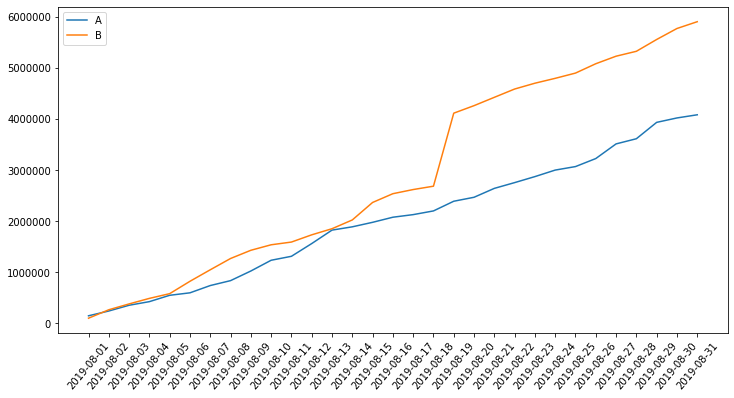

In [41]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: 
                                     orders[np.logical_and(orders['date'] <= 
                                                           x['date'], orders['group'] == 
                                                           x['group'])].agg({'date' : 'max',
                                                                             'group' : 'max',
                                                                             'transactionId' : pd.Series.nunique,
                                                                             'visitorId' : pd.Series.nunique,
                                                                             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= 
                                                                         x['date'], visitors['group'] == 
                                                                         x['group'])].agg({'date' : 'max',
                                                                                           'group' : 'max',
                                                                                           'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                                         right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 
                                                                      'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 
                                                                      'orders']]
plt.figure(figsize=(12, 6))
plt.tick_params(axis='x', rotation=50)
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.legend()

В какой-то момент сегмент В показал резкий рост и лидировал по выручке до конца тестирования - возможно, повлияли аномально большие заказы.

<font color='blue'>Правильно. </font>

График кумулятивного среднего чека по группам:

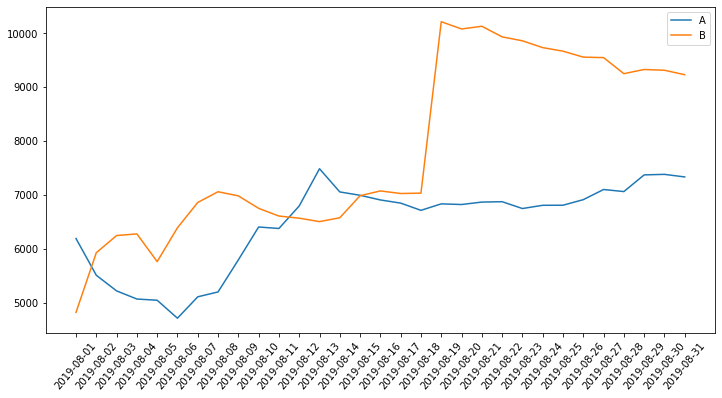

In [42]:
plt.figure(figsize=(12, 6))
plt.tick_params(axis='x', rotation=50)
plt.plot(cummulativeRevenueA['date'], 
         cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], 
         cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()

В первой половине теста кумулятивное значение среднего чека по сегментам показывало значительные колебания. Также видим резкий рост в сегменте В, что говорит о необходимости дополнительного анализа выбросов, которые могут искажать результаты.

<font color='blue'> Верно. </font>

График относительного изменения кумулятивного среднего чека группы B к группе A:

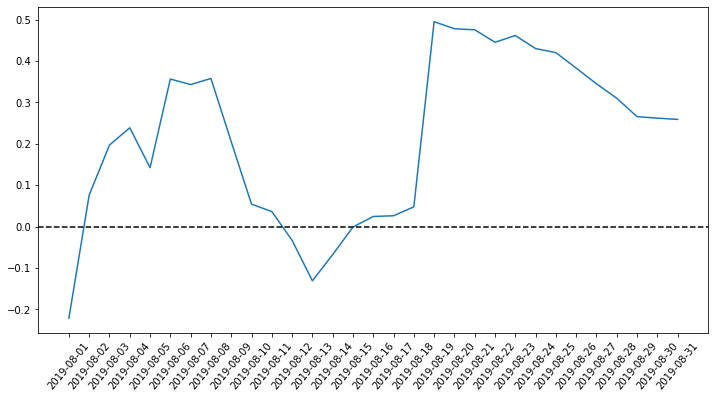

In [43]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, 
                                                     left_on='date', right_on='date', 
                                                     how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.tick_params(axis='x', rotation=50)
plt.plot(mergedCummulativeRevenue['date'], 
         (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/ \
         (mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

Результаты теста резко менялись несколько раз за тестовый период. Видимо, именно тогда были совершены аномальные заказы.

<font color='blue'> Верно </font>

График кумулятивной конверсии по группам:

['2019-08-01', '2019-08-31', 0, 0.05]

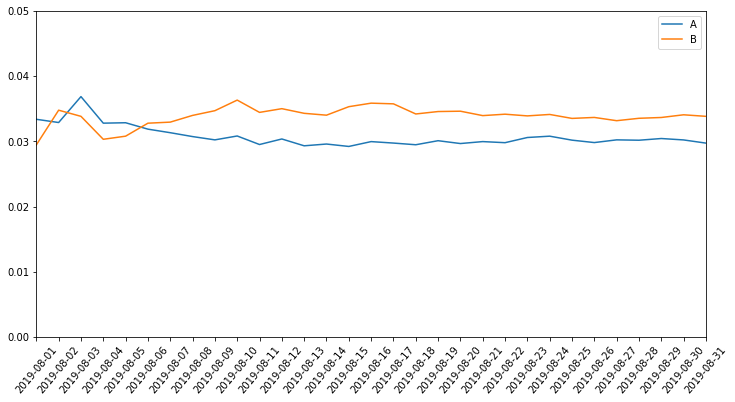

In [44]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(12, 6))
plt.tick_params(axis='x', rotation=50)
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

Конверсия сегмента В уверенно больше большую часть теста. В начале теста наблюдаются ожидаемые колебания, но к концу теста колебания почти отсутствуют, конверсии установились около своего среднего значения.

<font color='blue'> Хорошо, здесь лучше было приблизить график, ограничить зону отображения интервалом 0,25-0,4. </font>

График относительного изменения кумулятивной конверсии группы B к группе A:

['2019-08-01', '2019-08-31', -0.5, 0.5]

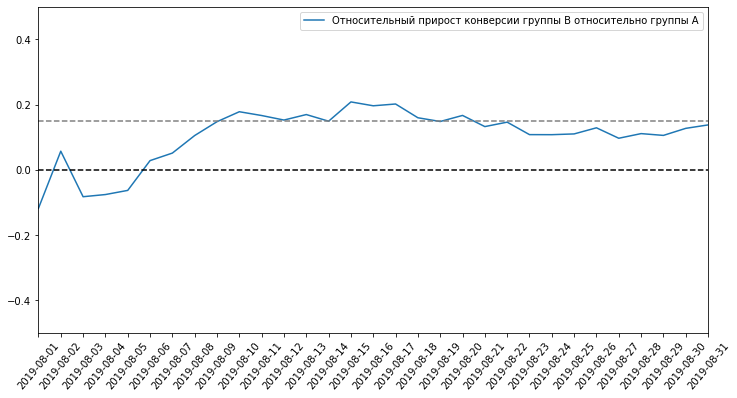

In [45]:
mergedCummulativeConversions = cummulativeDataA[['date',
                                                 'conversion']].merge(cummulativeDataB[['date',
                                                                                        'conversion']],
                                                                      left_on='date', right_on='date',
                                                                      how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.tick_params(axis='x', rotation=50)
plt.plot(mergedCummulativeConversions['date'], 
         mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

Практически сразу после начала теста сегмент В начинает превосходить сегмент А по конверсии, и относительный прирост конверсии сегмента В к сегменту А колеблется около 15%.

<font color='blue'> Ок, тоже можно было покрупнее изобразить. </font>

Точечный график количества заказов по пользователям:

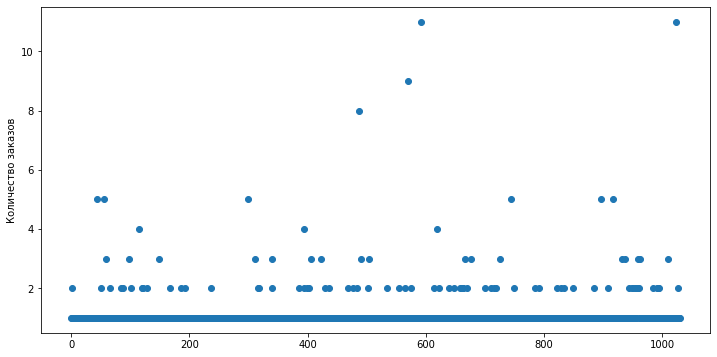

In [51]:
data = pd.read_csv('/datasets/orders.csv')
ordersByUsers = data.drop(['group', 'revenue', 'date'], 
                          axis=1).groupby('visitorId', 
                                          as_index=False).agg({'transactionId' : 
                                                               pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 6))
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'])

Очевидно аномальными являются пользователи с числом заказов более 2. Являются ли аномалией пользователи с числом заказов 2, нужно выяснять отдельно. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [12]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% покупателей совершали больше двух заказов, и не более 1% покупателей — больше 4-х заказов. 
границей для определения аномальных пользователей будем считать число заказов от 3 (включительно).

Построим точечный график стоимостей заказов:

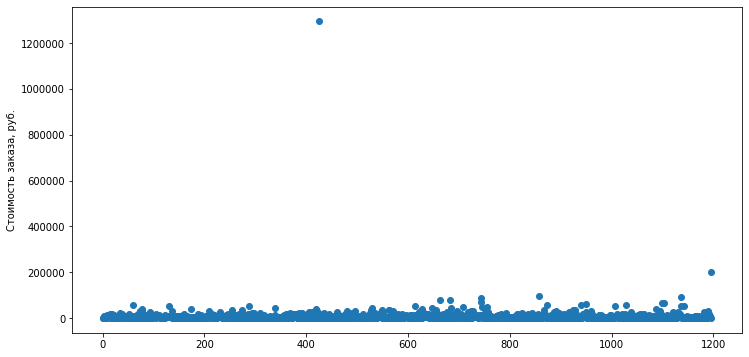

In [50]:
x_values = pd.Series(range(0,len(data['revenue'])))
plt.figure(figsize=(12, 6))
plt.ylabel('Стоимость заказа, руб.')
plt.scatter(x_values, data['revenue'])

Подавляющее число заказов по сумме не превысило 200000 руб.. Посчитаем 95-й и 99-й перцентили стоимости заказов, чтобы выбрать границу для определения аномальных заказов.

<font color='blue'> Хорошо, здесь стоило отметить тот заказ, который вывзвал скачки на графиках. </font>

In [14]:
print(np.percentile(data['revenue'], [95, 99]))

[28000.  58233.2]


Примем за границу аномальности сумму заказа свыше 30000 руб..

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [33]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: 
                                            visitorsADaily[visitorsADaily['date'] <= 
                                                           x['date']].agg({'date' : 'max', 
                                                                           'visitorsPerDateA' :
                                                                           'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: 
                                            visitorsBDaily[visitorsBDaily['date'] <= 
                                                           x['date']].agg({'date' : 'max', 
                                                                           'visitorsPerDateB' :
                                                                           'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', 
                                                      as_index=False).agg({'transactionId' : 
                                                                           pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', 
                                                      as_index=False).agg({'transactionId' : 
                                                                           pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                  len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                  len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)


print("P-value (различие в конверсии по 'сырым' данным):  {0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Отношение конверсий В/А по 'сырым' данным: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/ \
                       (data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value (различие в конверсии по 'сырым' данным):  0.0084
Отношение конверсий В/А по 'сырым' данным: 0.138


Разница конверсий между группами по «сырым» данным показывает статистическую значимость, относительный прирост конверсии сегмента В к сегменту А составляет почти 14%

<font color='blue'> Верно. </font>.  

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:

In [31]:
print("P-value (различие в среднем чеке по 'сырым' данным): {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

P-value (различие в среднем чеке по 'сырым' данным) 0.365


Нет статистически значимых отличий в среднем чеке между сегментами А и В по «сырым» данным. 

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:

In [27]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], 
                                axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], 
                          axis = 0).drop_duplicates().sort_values()

In [30]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                          len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                          len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)
print("P-value (различие в конверсии по 'очищенным' данным):  {0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Отношение конверсий В/А по 'очищенным' данным: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value (различие в конверсии по 'очищенным' данным)  0.0067
Отношение конверсий В/А по 'очищенным' данным 0.172


Разница конверсий между группами по «очищенным» данным показывает статистическую значимость, относительный прирост конверсии сегмента В к сегменту А составляет ~17%.

<font color='blue'> Правильно. </font>

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

In [32]:
print("P-value (различие в среднем чеке по 'очищенным' данным):  {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))


P-value (различие в среднем чеке по 'очищенным' данным)  0.360


Нет статистически значимых отличий в среднем чеке между сегментами А и В по «очищенным» данным.

<font color='blue'> Отлично, гипотезы проверены правильно. </font>

### Выводы:

 -  Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
 -  Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий
 -  График различия конверсии между группами сообщает, что результаты группы B лучше группы A
 -  Из графика различия среднего чека нельзя сделать определённые выводы
 
**Следует остановить тест, признать его успешным и зафиксировать победу группы В** - конверсия этой группы статистистически значимо больше, чем конверсия группы А (и по сырым, и по очищенным данным). 

<font color='blue'> Проеккт выполнен отлично, молодец. </font>